# Exercise 09.1 #

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.animation as animation

In [2]:
plt.rcParams['figure.figsize'] = [9.5, 6]

## Travelling Salesman Problem ##

The optimization problem is embeded through the 1D vector representation, using the length $L^2$ as cost function.
Each random instance - i.e. a route which connects all the cities and comes back to the starting position - is a list of integers representing the order in which the cities are visited.
Then the goal is to find the route which has the minimal total lenght, given by the sum of the distances between each pair of consecutive cities.

A realization of the problem is produced sampling random points in the plane, that represent the 30 cities.
Two different type of geometry are considered:
 - points uniformly distributed on a circle (_geometry_ = 0 in the code);
 - points uniformly distributed in a square (_geometry_ = 1 in the code).

A list of objects `City` consists in a relization of the TSP.
A specific instance is implemented in the object `Route`(contaning the list of cities and a specific path - i.e. the genotype - of the individual). The object has methods to compute its length, fitness, change its genotype and act on it through the mutation operators. 

## Genetic algorithm implementation ##
To implement a genetic algorithm for TSP first a population is needed, i.e. a collection of random routes.
Then by consecutive application of the selection, crossover and mutation operators a new generation is created.
(In parenthesis is provided the used input value for the named variables).

### Creation of the population ###
From the ordered configuration a random route is obtained by repeated pair permutations of cities.
The population is composed by _npop_ (= 1000) individuals.

### Selection ###
First the individuals are sorted by their fitness (i.e. the reciprocal of the length).
The _npop_ places available to become part of the new generation are filled in the following way:
1. If elitarism is activated the best _nelite_ (= 0) individuals directly go into the new generation;
2. The remaining places are filled choosing each individual with its selection probability, proportional to their fitness ($p_i = \frac{f_i}{\sum_i f_i}$). Clearly in this way an individual can appear more than once in the new population.

### Crossover ###
Then the crossover operator is called to act on the new poplation with probability _crossover_ (=0.5). 
1. Randomly a partner (_parent2_) is selected for each individual (_parent1_);
2. The two genotypes are cutted in the same random position;
3. The child is composed by the first part of _parent1_'s genotype and by the cities not appearing in the first part in the order in which they appear in _parent2_;
4. _Parent1_ is replaced by the child.

### Mutation ##
Three types of mutations are implemented and called indipendtly on each individual:
1. Pair permutations, called with probability _permutation_ (= 0.1);
2. Total shift, called with probability _tshift_ (= 0.1);
3. Inversion, called with probability _inversion_ (= 0 in the results shown, because added later).

### Evolution ###
The whole described process from selection to mutation is repeated for _ngen_ (= 300) generations and it is embeded in the method `Evolve()` of the class `Population`.

## Results for 30 cities ##

### On a circle ###

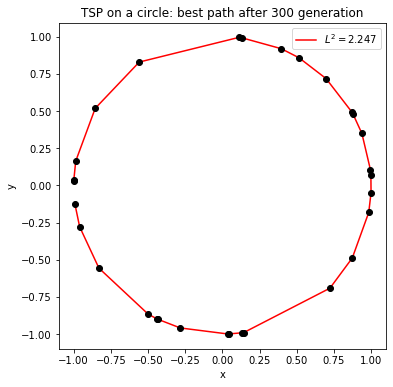

In [3]:
x_c, y_c = np.loadtxt("./results/circle/frames/path_300.xy", usecols=(1,2), unpack='true')

distance_c = 0
end_c = len(x_c) -1
for i in range(end_c):
    distance_c +=(x_c[i]-x_c[i+1])**2 + (y_c[i]-y_c[i+1])**2
distance_c += (x_c[end_c]-x_c[0])**2 + (y_c[end_c]-y_c[0])**2

plt.plot(x_c,y_c, '-r', label='$L^2 = {0:.3f}$'.format(distance_c))
plt.plot(x_c,y_c, 'ok')
plt.axis('scaled')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("TSP on a circle: best path after 300 generation")
plt.show()

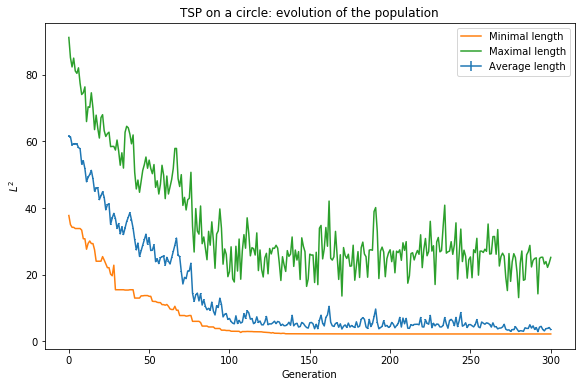

In [4]:
gen_c, ave_c, err_c, min_c, max_c = np.loadtxt("./results/circle/output.len.0", usecols=(0,1,2,3,4), unpack='true')

plt.errorbar(gen_c, ave_c, err_c, label='Average length')
plt.plot(gen_c, min_c, label='Minimal length')
plt.plot(gen_c, max_c, label='Maximal length')
plt.xlabel('Generation')
plt.ylabel('$L^2$')
plt.legend()
plt.title("TSP on a circle: evolution of the population")
plt.show()

![Tsp on a circle animation](./results/circle/tsp_circle.gif)

### Inside a square ###

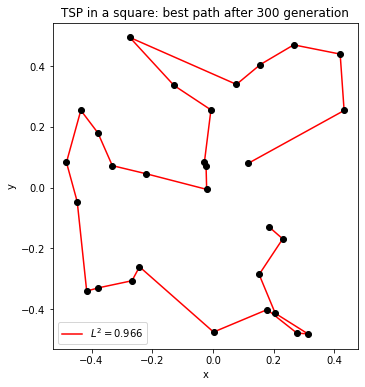

In [5]:
x_s, y_s = np.loadtxt("./results/square/frames/path_300.xy", usecols=(1,2), unpack='true')

distance_s = 0
end_s = len(x_s) -1
for i in range(end_s):
    distance_s += (x_s[i]-x_s[i+1])**2 + (y_s[i]-y_s[i+1])**2
distance_s += (x_s[end_s]-x_s[0])**2 + (y_s[end_s]-y_s[0])**2

plt.plot(x_s,y_s, '-r', label='$L^2 = {0:.3f}$'.format(distance_s))
plt.plot(x_s,y_s, 'ok')
plt.axis('scaled')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("TSP in a square: best path after 300 generation")
plt.show()

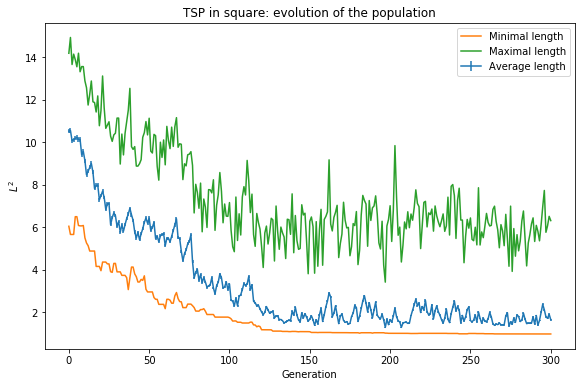

In [6]:
gen_s, ave_s, err_s, min_s, max_s = np.loadtxt("./results/square/output.len.0", usecols=(0,1,2,3,4), unpack='true')

plt.errorbar(gen_s, ave_s, err_s, label='Average length')
plt.plot(gen_s, min_s, label='Minimal length')
plt.plot(gen_s, max_s, label='Maximal length')
plt.xlabel('Generation')
plt.ylabel('$L^2$')
plt.legend()
plt.title("TSP in square: evolution of the population")
plt.show()

![Tsp in a square animation](./results/square/tsp_square.gif)

## Animated images creation ##
An animated evolution of the best path in the population with respect to the number of generations that has passed, shows with great effectiveness the genetic algorithm in action.

To generate an animated GIF the following steps were carried out:
1. printing of the best configuration at each generation through the C++ code;
2. printing of the single frames representing the best configurations through matplotlib;
3. combining of the PNG frames in a single GIF through imagemagick.

In [7]:
# FUNCTION TO PRINT FRAMES FOR GIF
def print_frames(folder, ngen):
    plt.figure(figsize=[5,5], dpi=100)
    for i in range(0,ngen+1):
        file = "./"+folder+"/frames/path_"+str(i)+".xy" 
        x_gif, y_gif = np.loadtxt(file, usecols=(1,2), unpack='true')
        plt.plot(x_gif, y_gif, '-r',label='Generation = {0}'.format(i))
        plt.plot(x_gif, y_gif, 'ok')
        plt.axis('scaled')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title("Best path")
        plt.legend(loc='upper right')
        plt.savefig("./"+folder+"/movie/frame_"+str(i)+".png")
        plt.clf()

In [8]:
# FRAMES CREATION IN FOLDER/MOVIE
#   print_frames("./results/circle",300)

To generate a GIF from PNG frames with *imagemagick*, run from the terminal:

`convert -delay 0.5 -loop 0 ./movie/frame_%d.png[0-300] -layers Optimize -fuzz 15% tsp_circle.gif`

Instead to generate an animated plot in the notebook run the following cell:

<IPython.core.display.Javascript object>


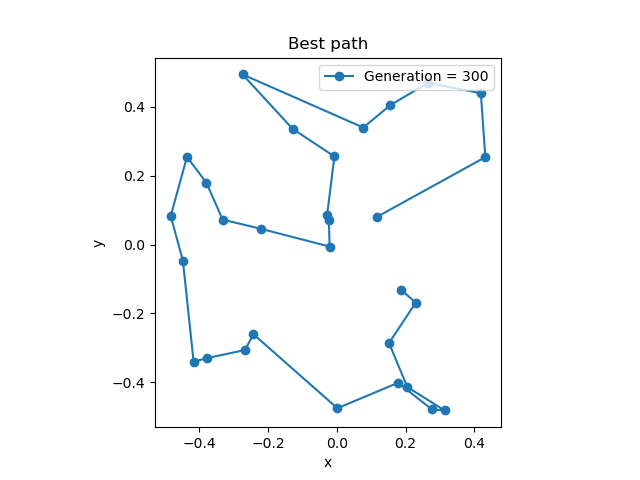

In [9]:
#ANIMATED GRAPH IN THE NOTEBOOK
%matplotlib notebook
#Creo figura e assi
fig = plt.figure()
ax = plt.axes()

#Carico i primi dati
file = "./results/square/frames/path_"+str(0)+".xy" 
x_gif, y_gif = np.loadtxt(file, usecols=(1,2), unpack='true')
frame, = ax.plot(x_gif, y_gif, '-o')

#Etichette grafico
frame.set_label('Generation = {0}'.format(0))
plt.axis('scaled')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Best path")
ax.legend(loc='upper right')

# Funzione animazione
def animate(i):
    file = "./results/square/frames/path_"+str(i)+".xy"
    x_gif, y_gif = np.loadtxt(file, usecols=(1,2), unpack='true')
    frame.set_data(x_gif, y_gif)
    frame.set_label('Generation = {0}'.format(i))
    ax.legend(loc='upper right')
    return frame,

#Genero animazione
ani = animation.FuncAnimation(fig, animate, frames=np.arange(0,301), interval=100, blit=True, repeat=False)

#Mostro animazione
plt.show()

#ani.save("./movie/tsp.html", writer='html')